## Simple demonstration of metrics

In [1]:
import os
import sys
sys.path.append('..')
from segmetrics import metrics
from skimage.io import imread

In [2]:
p = '/Users/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12'
true = imread(os.path.join(p, 'labels_compressed', 'l_7.tif'))
pred = imread(os.path.join(p, 'segmented_2019-11-27', 's_7.tif'))

In [3]:
metrix = metrics.calculate(true, pred)

In [4]:
print(metrix)


UNet Segmentation Metrics: 
True objects: 		  336
Predicted objects: 	  320
True positives: 	  315
False positives: 	   13
False negatives: 	   17
Jaccard metric: 	    0.91
Mean IoU metric: 	    0.83
Pixel identity: 	    0.97



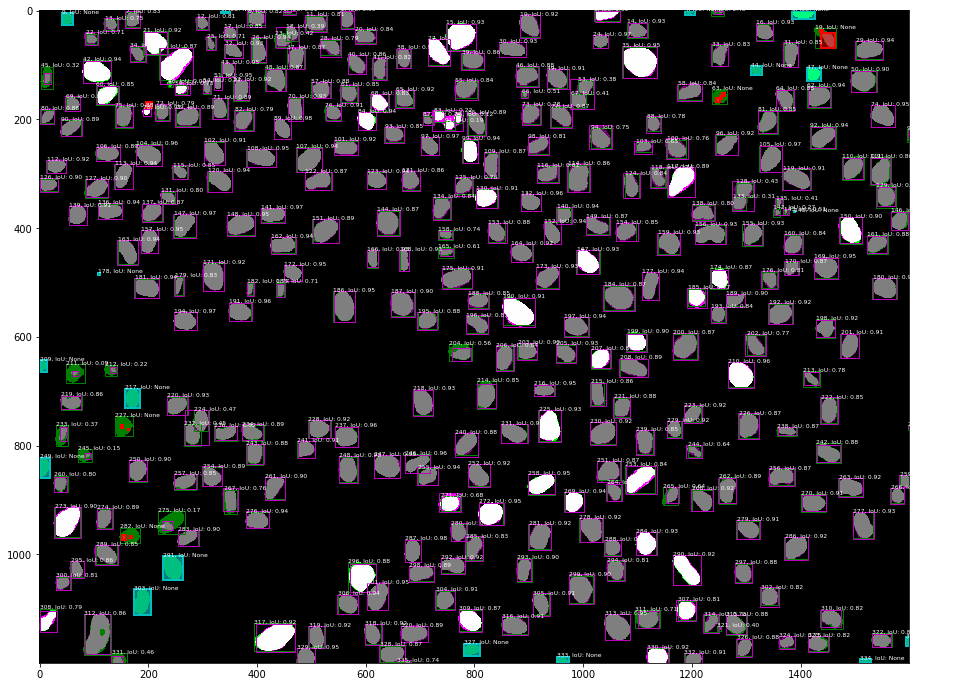

In [5]:
metrix.plot()